# Amazon Music Instrument Review Sentiment Analysis

Classifies whether a review as positive, neutral, or negative.
These classes were created by taking the feature "rating", which is on a scale of 1-5.
* 1-2: Negative
* 3: Neutral
* 4-5: Positive

## The Approach
The models I plan to use include Naive Bayes, Random Forest, XGBoost, and a LSTM

I removed all features except for the rating (and changing the rating to my 3 custom classes) and combined the overall and summary features.

After normalizing, filtering stop words, and tokenizing, I debated what to do next and decided on experimenting on whether lemmatization of the words would provide more accuracy or not.

After either technique, I will put the text data through a Tf-idf vectorizor to them feed to my models.

Each model will have their parameters tuned with a grid search.

In [75]:
import pickle
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.style as style

with open('Data/pickles/results_dict_no_lemma', 'rb') as file:
    results_dict_no_lemma = pickle.load(file)

## Without Lemmatization

### Naive Bayes

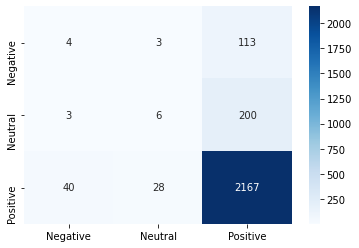

In [76]:
sns.heatmap(results_dict_no_lemma['mnb']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

While the overall score is great, the actual accuracy is not. Due to the imbalance in classes, the model has trouble predicting neutral and negative reviews. It just happens to be that there are so many positive reviews that the score is still "good".

I feel like this will be the typical trend for all my models.

### Random Forest

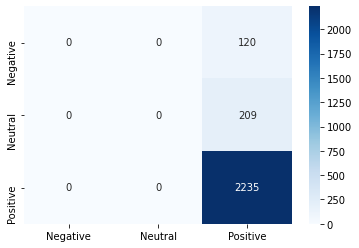

In [77]:
sns.heatmap(results_dict_no_lemma['rf']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

So Random Forest wasn't able to classify any of the neutral or negative reviews, but was able to classify every positive review. I think this is only attributed to the model only picking positive, because if it was good at classifying positive reviews, then would it still classify negative and neutral as positive reviews?


### XGBoost

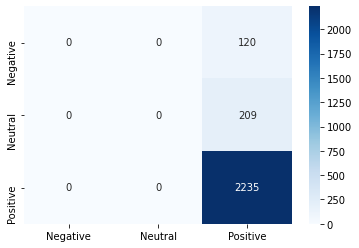

In [78]:
sns.heatmap(results_dict_no_lemma['xgboost']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

Really bad...

### LSTM

The neural network consists of an embedding layer, followed by 2 pairs of LSTM layers and dropout layers.

Early stopping rounds is set to 5

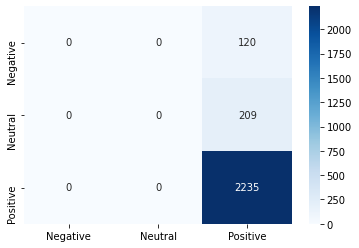

In [79]:
sns.heatmap(results_dict_no_lemma['lstm']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

Once again, the same. Enough of this as it is hard to watch. I only did it for scientific purposes

## A new approach

Now I will test by removing all samples from the "neutral" class and add them to the negative class. This is only 176 extra events, so I don't think there will be much of a difference made.

I am hesitant to under sample from the major class due to the fact that I know for sure it will hurt my scores. I will report how the model does with this new approach and move from there.

In [80]:
with open('Data/pickles/new_approach/results_dict_no_lemma', 'rb') as file:
    results_dict_no_lemma_new_approach = pickle.load(file)

### Naive Bayes

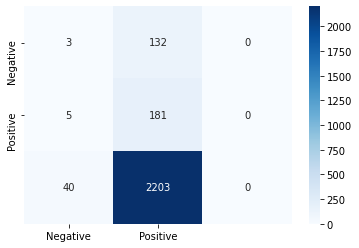

In [81]:
sns.heatmap(results_dict_no_lemma_new_approach['mnb']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

### Random Forest

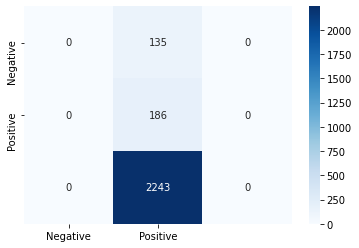

In [82]:
sns.heatmap(results_dict_no_lemma_new_approach['rf']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

### XGBoost

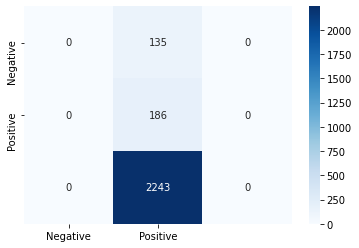

In [83]:
sns.heatmap(results_dict_no_lemma_new_approach['xgboost']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

### LSTM

The neural network consists of an embedding layer, followed by 2 pairs of LSTM layers and dropout layers.

Early stopping rounds is set to 5

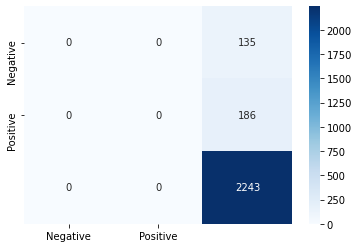

In [84]:
sns.heatmap(results_dict_no_lemma_new_approach['lstm']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

It seems that removing the neutral class did not help our issue. I am only left with the choice of removing samples from the majority class. I will remove a random events from the major class and see what happens.


## Random Under Sampling - No Lemma

In [85]:
with open('Data/pickles/new_approach_2/results_dict_no_lemma', 'rb') as file:
    results_dict_no_lemma_new_approach_2 = pickle.load(file)

### Naive Bayes

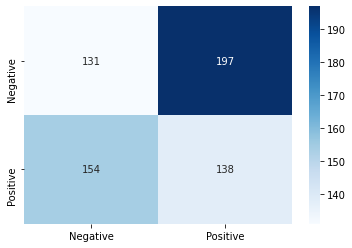

In [86]:
sns.heatmap(results_dict_no_lemma_new_approach_2['mnb']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

Now we see that removing events from the majority class balances out the scores. MNB did not preform well at all. The accuracy of the predictions is 50%, which is pretty bad. At least the scores are actually realisitc now.

### Random Forest

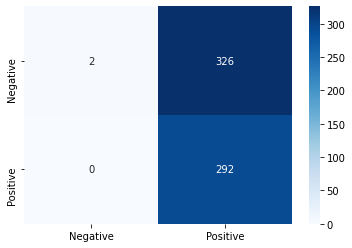

In [87]:
sns.heatmap(results_dict_no_lemma_new_approach_2['rf']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

For Random Forest, the same issue persists in that the model only predicts positive sentiment

### XGBoost

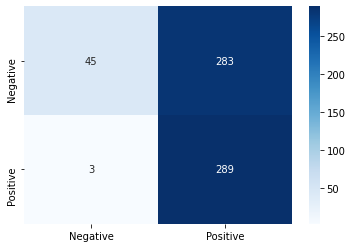

In [88]:
sns.heatmap(results_dict_no_lemma_new_approach_2['xgboost']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])


XGBoost has the same issue as Random Forest, but predicts negative slightly more.

### LSTM

The neural network consists of an embedding layer, followed by 2 pairs of LSTM layers and dropout layers.

Early stopping rounds is set to 5

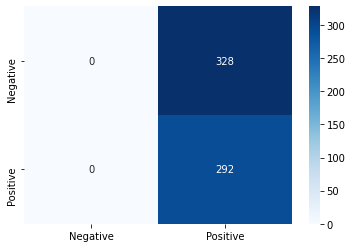

In [89]:
sns.heatmap(results_dict_no_lemma_new_approach_2['lstm']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

And it seems that LSTM has a hard time detecting negative sentiment

Random Under-Sampling with Lemmatization